In [ ]:
import gradio as gr
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load Stable Diffusion Inpainting Model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting"
).to(device)

print("✅ Model Loaded Successfully!")

# Function to apply inpainting
def modify_nose(input_image, nose_style):
    input_image = input_image.resize((512, 512))

    # Create an empty mask
    mask = np.zeros((512, 512), dtype=np.uint8)

    # Define nose position (Adjust as needed)
    nose_x, nose_y, nose_width, nose_height = 170, 115, 50, 60
    mask[nose_y:nose_y+nose_height, nose_x:nose_x+nose_width] = 255

    # Convert mask to PIL Image
    mask_image = Image.fromarray(mask).convert("L")

    # Define style-specific prompts
    prompts = {
        "Small": "A woman with a small delicate nose, side profile.",
        "Sharp": "A woman with a sharp pointed nose, side profile.",
        "Round": "A woman with a round nose, side profile.",
        "Wide": "A woman with a wide broad nose, side profile.",
        "Natural": "A woman with a natural nose, side profile."
    }

    prompt = prompts[nose_style]

    # Apply inpainting
    edited_image = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, extra artifacts, unnatural",
        image=input_image,
        mask_image=mask_image,
        guidance_scale=12.0
    ).images[0]

    return edited_image

# Gradio Interface
iface = gr.Interface(
    fn=modify_nose,
    inputs=[
        gr.Image(type="pil", label="Upload Side-View Image"),
        gr.Radio(["Small", "Sharp", "Round", "Wide", "Natural"], label="Select Nose Style")
    ],
    outputs=gr.Image(label="Modified Image"),
    title="Rhinoplasty AI",
    description="Upload a side-view face image and modify the nose shape using AI-powered inpainting."
)

# Launch the app in Colab
iface.launch(share=True)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Model Loaded Successfully!
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f9904cf281de2033de.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [1]:
pip install gradio

In [2]:
import gradio as gr
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load Stable Diffusion Inpainting Model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting"
).to(device)

print("✅ Model Loaded Successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Model Loaded Successfully!


In [ ]:
!rm -rf /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting


from diffusers import StableDiffusionInpaintPipeline
import torch

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "Lykon/dreamshaper-8-inpainting",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to("cuda" if torch.cuda.is_available() else "cpu")

print("✅ DreamShaper Inpainting Model Loaded Successfully!")

model_index.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/767 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:30: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


✅ DreamShaper Inpainting Model Loaded Successfully!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import dlib
import cv2
from PIL import Image
import gradio as gr

# Load face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/My Drive/shape_predictor_68_face_landmarks.dat")

# Your inpainting pipeline (make sure it's defined or loaded earlier in your code)
# Example: pipe = StableDiffusionInpaintPipeline.from_pretrained(...)

def modify_nose_front(input_image, nose_style):
    # Resize image for consistency
    input_image = input_image.resize((512, 512))
    img_array = np.array(input_image)
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = detector(gray)
    if len(faces) == 0:
        raise ValueError("No face detected.")

    # Assume first face
    landmarks = predictor(gray, faces[0])

    # Nose landmark points (index 27 to 35)
    nose_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(27, 36)]
    x_coords = [pt[0] for pt in nose_points]
    y_coords = [pt[1] for pt in nose_points]
    nose_x = min(x_coords)
    nose_y = min(y_coords)
    nose_width = max(x_coords) - nose_x
    nose_height = max(y_coords) - nose_y

    # Create mask from detected nose bounding box
    mask = np.zeros((512, 512), dtype=np.uint8)
    mask[nose_y:nose_y+nose_height, nose_x:nose_x+nose_width] = 255
    mask_image = Image.fromarray(mask).convert("L")

    # Extended style prompts
    prompts = {
        "Small": "Front view portrait of a person with a small, delicate nose. Symmetrical, natural skin, high detail, photorealistic.",
        "Sharp": "Front view portrait of a person with a sharp, well-defined nose bridge and narrow nostrils. Realistic, high-definition facial features.",
        "Round": "Front view portrait of a person with a round, bulbous nose. Smooth skin, natural expression, studio lighting.",
        "Wide": "Front view portrait of a person with a wide, flat nose and broad nostrils. Ethnic diversity, clear focus, realistic lighting.",
        "Natural": "Front view portrait of a person with a naturally shaped nose. No exaggeration, authentic facial features, photorealism.",
        "Pointed": "Front view portrait of a person with a narrow, pointed nose tip and slender bridge. Elegant features, high clarity, photorealistic.",
        "Button": "Front view portrait of a person with a cute button-shaped nose. Slightly upturned tip, soft round features, clean lighting.",
        "Greek": "Front view portrait of a person with a straight Greek nose, no bridge curvature. Sculpted face, balanced features, realistic lighting.",
        "Roman": "Front view portrait of a person with a Roman nose having a high bridge and slight bend. Classic profile, noble look, natural shadows.",
        "Snub": "Front view portrait of a person with a snub nose, short and slightly upturned tip. Youthful appearance, even tone, high resolution."
    }

    prompt = prompts[nose_style]

    # Inpainting using diffusion pipeline
    edited = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, deformed face, extra limbs, low quality, artifact",
        image=input_image,
        mask_image=mask_image,
        num_inference_steps=75,
        guidance_scale=7.5
    ).images[0]

    return edited

# Gradio interface
iface = gr.Interface(
    fn=modify_nose_front,
    inputs=[
        gr.Image(type="pil", label="Upload Front-View Image"),
        gr.Radio(
            [
                "Small", "Sharp", "Round", "Wide", "Natural",
                "Pointed", "Button", "Greek", "Roman", "Snub"
            ],
            label="Select Nose Style"
        )
    ],
    outputs=gr.Image(label="Modified Image"),
    title="Rhinoplasty AI - Front View",
    description="Upload a front-view face image and modify the nose shape using AI-powered inpainting with automatic nose detection."
)

# Launch in Colab or locally
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ba23fc389ec8cab4b0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import numpy as np
import dlib
import cv2
from PIL import Image
import torch
import gradio as gr
import os
import urllib.request
from diffusers import StableDiffusionInpaintPipeline

# Load Inpainting Model
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "Lykon/dreamshaper-8-inpainting",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to("cuda" if torch.cuda.is_available() else "cpu")

# Load Dlib Front-Face Landmarks
predictor_path = "/content/drive/My Drive/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Download OpenCV RetinaFace-like model
proto_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt"
model_url = "https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel"
proto_path = "deploy.prototxt"
model_path = "res10_300x300_ssd_iter_140000.caffemodel"

if not os.path.isfile(proto_path):
    urllib.request.urlretrieve(proto_url, proto_path)
if not os.path.isfile(model_path):
    urllib.request.urlretrieve(model_url, model_path)

face_net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

# Nose style prompts
front_prompts = {
    "Small": "Front view portrait of a person with a small, delicate nose...",
    "Sharp": "Front view portrait of a person with a sharp, well-defined nose...",
    "Round": "Front view portrait of a person with a round, bulbous nose...",
    "Wide": "Front view portrait of a person with a wide, flat nose...",
    "Natural": "Front view portrait of a person with a natural nose...",
    "Pointed": "Front view portrait of a person with a pointed, slender nose...",
    "Button": "Front view portrait of a person with a cute button nose...",
    "Greek": "Front view portrait of a person with a straight Greek nose...",
    "Roman": "Front view portrait of a person with a Roman nose with a high bridge...",
    "Snub": "Front view portrait of a person with a snub, upturned nose..."
}

side_prompts = {
    "Small": "Side view portrait of a woman with a small, delicate nose...",
    "Sharp": "Side profile of a woman with a sharp, defined nose...",
    "Round": "Side view portrait of a woman with a round, bulbous nose...",
    "Wide": "Side profile of a woman with a wide, broad nose...",
    "Natural": "Side view portrait of a woman with a naturally shaped nose...",
    "Pointed": "Side profile of a woman with a pointed, slender nose...",
    "Greek": "Side view of a woman with a straight Greek nose...",
    "Roman": "Side view portrait of a woman with a Roman nose, strong bridge...",
    "Snub": "Side view portrait of a woman with a snub, upturned nose...",
    "Button": "Side profile of a woman with a cute button nose..."
}

# Improved RetinaFace-like detection for side view
def detect_side_face_retina(image):
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
                                 (104.0, 177.0, 123.0))
    face_net.setInput(blob)
    detections = face_net.forward()
    h, w = image.shape[:2]
    max_confidence = 0
    face_box = None

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > max_confidence and confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            face_box = box.astype("int")
            max_confidence = confidence

    return face_box

# Nose region estimation
# Nose region estimation
def estimate_nose_region(img_bgr, view_type):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    h, w = img_bgr.shape[:2]

    if view_type == "Front View":
        faces = detector(gray)
        if len(faces) == 0:
            return None

        landmarks = predictor(gray, faces[0])
        nose_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(27, 36)]
        x_coords = [pt[0] for pt in nose_points]
        y_coords = [pt[1] for pt in nose_points]

        nose_x = min(x_coords)
        nose_y = min(y_coords)
        nose_width = max(x_coords) - nose_x
        nose_height = max(y_coords) - nose_y
        return nose_x, nose_y, nose_width, nose_height

    else:
        # Fixed nose region for side-view images (adjust as needed)
        nose_x, nose_y, nose_width, nose_height = 170, 115, 50, 60
        return nose_x, nose_y, nose_width, nose_height


# Inpainting process
def modify_nose_view(input_image, view_type, nose_style):
    input_image = input_image.resize((512, 512))
    img_array = np.array(input_image)
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)

    nose_box = estimate_nose_region(img_bgr, view_type)
    if nose_box is None:
        return "❌ No face/nose detected. Please try a clearer or better-angled side image."

    nose_x, nose_y, nose_width, nose_height = nose_box
    prompt = (front_prompts if view_type == "Front View" else side_prompts).get(nose_style, "natural nose")

    # Mask
    mask = np.zeros((512, 512), dtype=np.uint8)
    padding = 5  # Add a buffer around the nose
    center = (nose_x + nose_width // 2, nose_y + nose_height // 2)
    axes = (int(nose_width * 0.7) + padding, int(nose_height * 1.2) + padding)
    cv2.ellipse(mask, center, axes, 0, 0, 360, 255, -1)
    mask = cv2.GaussianBlur(mask, (35, 35), 0)  # Larger blur = softer edges
    mask_image = Image.fromarray(mask).convert("L")


    # Inpainting
    result = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, artifact, bad nose",
        image=input_image,
        mask_image=mask_image,
        guidance_scale=7.5,
        num_inference_steps=50,
        strength=0.75
    )

    return result.images[0]

# Update available nose styles
def update_nose_styles(view_type):
    return gr.update(choices=list(front_prompts if view_type == "Front View" else side_prompts), value="Natural")

# Gradio Interface
with gr.Blocks() as iface:
    gr.Markdown("# 🧠 Rhinoplasty AI")
    gr.Markdown("Upload a **front-view** or **side-view** face image and choose a nose style to modify.")

    with gr.Row():
        img_input = gr.Image(type="pil", label="Upload Face Image")
        view_input = gr.Radio(["Front View", "Side View"], label="Select View", value="Front View")
        style_input = gr.Radio(list(front_prompts), label="Select Nose Style")

    output_img = gr.Image(label="Modified Output")

    view_input.change(fn=update_nose_styles, inputs=view_input, outputs=style_input)
    gr.Button("Modify Nose").click(fn=modify_nose_view, inputs=[img_input, view_input, style_input], outputs=output_img)

iface.launch(share=True)
# lalala

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://02236c0eee68b01820.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [6]:
# Modifying the code so that the side-view logic uses the exact same rectangular mask logic from the earlier example
# instead of the ellipse + blur mask used for front-view.

import numpy as np
import dlib
import cv2
from PIL import Image
import torch
import gradio as gr
import os
import urllib.request
from diffusers import StableDiffusionInpaintPipeline

# Load Inpainting Model
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting"
).to(device)

# Load Dlib Front-Face Landmarks
predictor_path = "/content/drive/My Drive/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Download RetinaFace-like model (OpenCV DNN)
proto_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt"
model_url = "https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel"
proto_path = "deploy.prototxt"
model_path = "res10_300x300_ssd_iter_140000.caffemodel"

if not os.path.isfile(proto_path):
    urllib.request.urlretrieve(proto_url, proto_path)
if not os.path.isfile(model_path):
    urllib.request.urlretrieve(model_url, model_path)

face_net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

# Nose style prompts
front_prompts = {
    "Small": "Front view of a realistic portrait photo of a person with a small, delicate nose",
    "Sharp": "Front view of a realistic portrait photo of a person with a sharp, defined nose",
    "Round": "Front view of a realistic portrait photo of a person with a round, bulbous nose",
    "Wide": "Front view of a realistic portrait photo of a person with a wide, flat nose",
    "Natural": "Front view of a realistic portrait photo of a person with a natural nose",
    "Pointed": "Front view of a realistic portrait photo of a person with a pointed, slender nose",
    "Button": "Front view of a realistic portrait photo of a person with a small button nose",
    "Greek": "Front view of a realistic portrait photo of a person with a classical Greek nose",
    "Roman": "Front view of a realistic portrait photo of a person with a Roman nose",
    "Snub": "Front view of a realistic portrait photo of a person with a snub nose"
}

side_prompts = {
    "Small": "Side view portrait of a person with a small, delicate nose",
    "Sharp": "Side profile of a person with a sharp, defined nose",
    "Round": "Side view portrait of a person with a round, bulbous nose",
    "Wide": "Side profile of a person with a wide, broad nose",
    "Natural": "Side view portrait of a person with a naturally shaped nose",
    "Pointed": "Side profile of a person with a pointed, slender nose",
    "Greek": "Side view of a person with a straight Greek nose",
    "Roman": "Side view portrait of a person with a Roman nose, strong bridge",
    "Snub": "Side view portrait of a person with a snub, upturned nose",
    "Button": "Side profile of a person with a cute button nose"
}

# Estimate nose region
def estimate_nose_region(img_bgr, view_type):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    if view_type == "Front View":
        faces = detector(gray)
        if len(faces) == 0:
            return None

        landmarks = predictor(gray, faces[0])
        nose_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(27, 36)]
        x_coords = [pt[0] for pt in nose_points]
        y_coords = [pt[1] for pt in nose_points]

        nose_x = min(x_coords)
        nose_y = min(y_coords)
        nose_width = max(x_coords) - nose_x
        nose_height = max(y_coords) - nose_y
        return nose_x, nose_y, nose_width, nose_height
    else:
        return 370, 200, 100, 100

# Inpainting with rectangular mask for side-view
def modify_nose_view(input_image, view_type, nose_style):
    input_image = input_image.resize((512, 512))
    img_array = np.array(input_image)
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)

    nose_box = estimate_nose_region(img_bgr, view_type)
    if nose_box is None:
        return "❌ No face/nose detected. Please try again with a clearer front-view image."

    nose_x, nose_y, nose_width, nose_height = nose_box
    prompt = (front_prompts if view_type == "Front View" else side_prompts).get(nose_style, "natural nose")

    mask = np.zeros((512, 512), dtype=np.uint8)

    if view_type == "Side View":
        # Use rectangular mask directly for side view
        mask[nose_y:nose_y+nose_height, nose_x:nose_x+nose_width] = 255
    else:
        # Use elliptical + blur mask for front view
        padding = 5
        center = (nose_x + nose_width // 2, nose_y + nose_height // 2)
        axes = (int(nose_width * 0.7) + padding, int(nose_height * 1.2) + padding)
        cv2.ellipse(mask, center, axes, 0, 0, 360, 255, -1)
        mask = cv2.GaussianBlur(mask, (15, 15), 0)

    mask_image = Image.fromarray(mask).convert("L")

    result = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, artifact, bad nose",
        image=input_image.copy(),
        mask_image=mask_image,
        guidance_scale=7.5,
        num_inference_steps=50,
        strength=0.65
    )

    return result.images[0]

# Update styles based on view
def update_nose_styles(view_type):
    return gr.update(choices=list(front_prompts if view_type == "Front View" else side_prompts), value="Natural")

# Gradio Interface
with gr.Blocks(title="Rhinoplasty AI") as iface:
    gr.Markdown("## 👃 Rhinoplasty AI – Nose Style Modifier")
    gr.Markdown("Upload a **front-view** or **side-view** image and select your desired **nose style**.")

    with gr.Row():
        with gr.Column():
            img_input = gr.Image(type="pil", label="📤 Upload Face Image", show_label=True)
            view_input = gr.Radio(["Front View", "Side View"], label="👁️ Choose View", value="Front View")
            style_input = gr.Radio(list(front_prompts), label="✨ Choose Nose Style", value="Natural")
            submit_btn = gr.Button("🔄 Modify Nose")

        with gr.Column():
            output_img = gr.Image(label="🖼️ Modified Output", show_label=True)

    # Update nose style list on view change
    view_input.change(fn=update_nose_styles, inputs=view_input, outputs=style_input)
    submit_btn.click(fn=modify_nose_view, inputs=[img_input, view_input, style_input], outputs=output_img)
    gr.Markdown("""
    ### ℹ️ About

    This AI tool performs **virtual rhinoplasty** using **Stable Diffusion 2 Inpainting** for image generation. It identifies the nose region in front-view or side-view photos and modifies it based on a chosen nose style prompt.

    - 🤖 **Models Used**:
      - `StableDiffusionInpaintPipeline` from 🤗 Hugging Face Diffusers.
      - `dlib` for landmark detection (front-view).
      - OpenCV DNN (RetinaFace-like) for side-view face localization (with fixed nose region currently).

    ### 📸 Important Notes:
    - For **front-view**, ensure the face is clearly visible and centered.
    - For **side-view**, upload a clean side profile with the nose and face in profile view (left only and with placing the nose exact at the center of the picture).
    - Avoid blurry, cropped, or low-resolution images for best results.
    """)
    gr.HTML("""
    <style>
    .background-container {
        position: fixed;
        top: 0;
        left: 0;
        height: 100%;
        width: 100%;
        z-index: -1;
        overflow: hidden;
    }
    .background-container::before {
    content: "";
    background-image: url('https://media.istockphoto.com/id/1403481351/photo/woman-rhinoplasty-women-nose-shape-before-and-after-plastic-surgery-beauty-model-profile-side.jpg?s=612x612&w=0&k=20&c=krnd1SVhi4mr_k570Z3IV9OJrnyOpmLiKtmxDo3zm2g=');
    background-repeat: no-repeat;
    background-size: cover;
    background-position: center center;
    position: absolute;
    height: 100%;
    width: 100%;
    opacity: 0.25;  /* Adjust visibility */
    filter: blur(8px);  /* Adjust blur */
  }

    </style>
    <div class="background-container"></div>
    """)
iface.launch(share=True)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://251174627c0dc8cc9d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [11]:
import numpy as np
import dlib
import cv2
from PIL import Image
import torch
import gradio as gr
import os
import urllib.request
from diffusers import StableDiffusionInpaintPipeline

# Load Inpainting Model
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting"
).to(device)

# Load Dlib Front-Face Landmarks
predictor_path = "/content/drive/My Drive/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Download RetinaFace-like model (OpenCV DNN)
proto_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt"
model_url = "https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel"
proto_path = "deploy.prototxt"
model_path = "res10_300x300_ssd_iter_140000.caffemodel"

if not os.path.isfile(proto_path):
    urllib.request.urlretrieve(proto_url, proto_path)
if not os.path.isfile(model_path):
    urllib.request.urlretrieve(model_url, model_path)

face_net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

# Nose style prompts
front_prompts = {
    "Small": "Front view of a realistic portrait photo of a person with a small, delicate nose",
    "Sharp": "Front view of a realistic portrait photo of a person with a sharp, defined nose",
    "Round": "Front view of a realistic portrait photo of a person with a round, bulbous nose",
    "Wide": "Front view of a realistic portrait photo of a person with a wide, flat nose",
    "Natural": "Front view of a realistic portrait photo of a person with a natural nose",
    "Pointed": "Front view of a realistic portrait photo of a person with a pointed, slender nose",
    "Button": "Front view of a realistic portrait photo of a person with a small button nose",
    "Greek": "Front view of a realistic portrait photo of a person with a classical Greek nose",
    "Roman": "Front view of a realistic portrait photo of a person with a Roman nose",
    "Snub": "Front view of a realistic portrait photo of a person with a snub nose"
}

left_prompts = {
    "Small": "Left side profile of a person with a small, delicate nose",
    "Sharp": "Left profile of a person with a sharp, defined nose",
    "Round": "Left side profile of a person with a round, bulbous nose",
    "Wide": "Left profile of a person with a wide, broad nose",
    "Natural": "Left side portrait with a naturally shaped nose",
    "Pointed": "Left profile of a person with a pointed, slender nose",
    "Greek": "Left side of a person with a straight Greek nose",
    "Roman": "Left profile with a Roman nose, strong bridge",
    "Snub": "Left side with a snub, upturned nose",
    "Button": "Left profile of a person with a cute button nose"
}

right_prompts = {
    "Small": "Right side profile of a person with a small, delicate nose",
    "Sharp": "Right profile of a person with a sharp, defined nose",
    "Round": "Right side profile of a person with a round, bulbous nose",
    "Wide": "Right profile of a person with a wide, broad nose",
    "Natural": "Right side portrait with a naturally shaped nose",
    "Pointed": "Right profile of a person with a pointed, slender nose",
    "Greek": "Right side of a person with a straight Greek nose",
    "Roman": "Right profile with a Roman nose, strong bridge",
    "Snub": "Right side with a snub, upturned nose",
    "Button": "Right profile of a person with a cute button nose"
}

# Estimate nose region
def estimate_nose_region(img_bgr, view_type):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    if view_type == "Front View":
        faces = detector(gray)
        if len(faces) == 0:
            return None
        landmarks = predictor(gray, faces[0])
        nose_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(27, 36)]
        x_coords = [pt[0] for pt in nose_points]
        y_coords = [pt[1] for pt in nose_points]
        nose_x = min(x_coords)
        nose_y = min(y_coords)
        nose_width = max(x_coords) - nose_x
        nose_height = max(y_coords) - nose_y
        return nose_x, nose_y, nose_width, nose_height

    elif view_type == "Right Side View":
        return 370, 200, 100, 100  # Right side of face
    elif view_type == "Left Side View":
        return 42, 200, 100, 100   # Symmetric left side of face

# Inpainting with rectangular mask
def modify_nose_view(input_image, view_type, nose_style):
    input_image = input_image.resize((512, 512))
    img_array = np.array(input_image)
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)

    nose_box = estimate_nose_region(img_bgr, view_type)
    if nose_box is None:
        return "❌ No face/nose detected. Please try again with a clearer front-view image."

    nose_x, nose_y, nose_width, nose_height = nose_box

    # Get prompt based on view type
    if view_type == "Front View":
        prompt = front_prompts.get(nose_style, "natural nose")
    elif view_type == "Left Side View":
        prompt = left_prompts.get(nose_style, "natural nose")
    else:
        prompt = right_prompts.get(nose_style, "natural nose")

    mask = np.zeros((512, 512), dtype=np.uint8)

    if view_type == "Front View":
        padding = 5
        center = (nose_x + nose_width // 2, nose_y + nose_height // 2)
        axes = (int(nose_width * 0.7) + padding, int(nose_height * 1.2) + padding)
        cv2.ellipse(mask, center, axes, 0, 0, 360, 255, -1)
        mask = cv2.GaussianBlur(mask, (15, 15), 0)
    else:
        # Use rectangular mask for left and right side view
        mask[nose_y:nose_y+nose_height, nose_x:nose_x+nose_width] = 255

    mask_image = Image.fromarray(mask).convert("L")

    result = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, artifact, bad nose",
        image=input_image.copy(),
        mask_image=mask_image,
        guidance_scale=7.5,
        num_inference_steps=55,
        strength=0.5
    )

    return result.images[0]

# Update styles based on view
def update_nose_styles(view_type):
    if view_type == "Front View":
        return gr.update(choices=list(front_prompts), value="Natural")
    elif view_type == "Left Side View":
        return gr.update(choices=list(left_prompts), value="Natural")
    else:
        return gr.update(choices=list(right_prompts), value="Natural")

# Gradio Interface
with gr.Blocks(title="Rhinoplasty AI") as iface:
    gr.Markdown("## 👃 Rhinoplasty AI – Nose Style Modifier")
    gr.Markdown("Upload a **front-view**, **left**, or **right** side-view image and choose your nose style.")

    with gr.Row():
        with gr.Column():
            img_input = gr.Image(type="pil", label="📤 Upload Face Image", show_label=True)
            view_input = gr.Radio(["Front View", "Left Side View", "Right Side View"], label="👁️ Choose View", value="Front View")
            style_input = gr.Radio(list(front_prompts), label="✨ Choose Nose Style", value="Natural")
            submit_btn = gr.Button("🔄 Modify Nose")

        with gr.Column():
            output_img = gr.Image(label="🖼️ Modified Output", show_label=True)

    view_input.change(fn=update_nose_styles, inputs=view_input, outputs=style_input)
    submit_btn.click(fn=modify_nose_view, inputs=[img_input, view_input, style_input], outputs=output_img)

    gr.Markdown("""
    ### ℹ️ About

    This AI tool performs **virtual rhinoplasty** using **Stable Diffusion 2 Inpainting**.

    - 🤖 Models:
      - `StableDiffusionInpaintPipeline` from HuggingFace 🤗
      - `dlib` for front-face landmark detection
      - OpenCV DNN (RetinaFace-like) fallback for region estimation

    ### 📸 Tips:
    - For **left/right** views, keep the nose centered in the image.
    - Use **clear**, **high-resolution** side profiles for better results.
    """)
    gr.HTML("""
    <style>
    .background-container {
        position: fixed;
        top: 0;
        left: 0;
        height: 100%;
        width: 100%;
        z-index: -1;
        overflow: hidden;
    }
    .background-container::before {
    content: "";
    background-image: url('https://media.istockphoto.com/id/1403481351/photo/woman-rhinoplasty-women-nose-shape-before-and-after-plastic-surgery-beauty-model-profile-side.jpg?s=612x612&w=0&k=20&c=krnd1SVhi4mr_k570Z3IV9OJrnyOpmLiKtmxDo3zm2g=');
    background-repeat: no-repeat;
    background-size: cover;
    background-position: center center;
    position: absolute;
    height: 100%;
    width: 100%;
    opacity: 0.25;
    filter: blur(8px);
  }
    </style>
    <div class="background-container"></div>
    """)

iface.launch(share=True)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a54544d59d1b6df4b3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


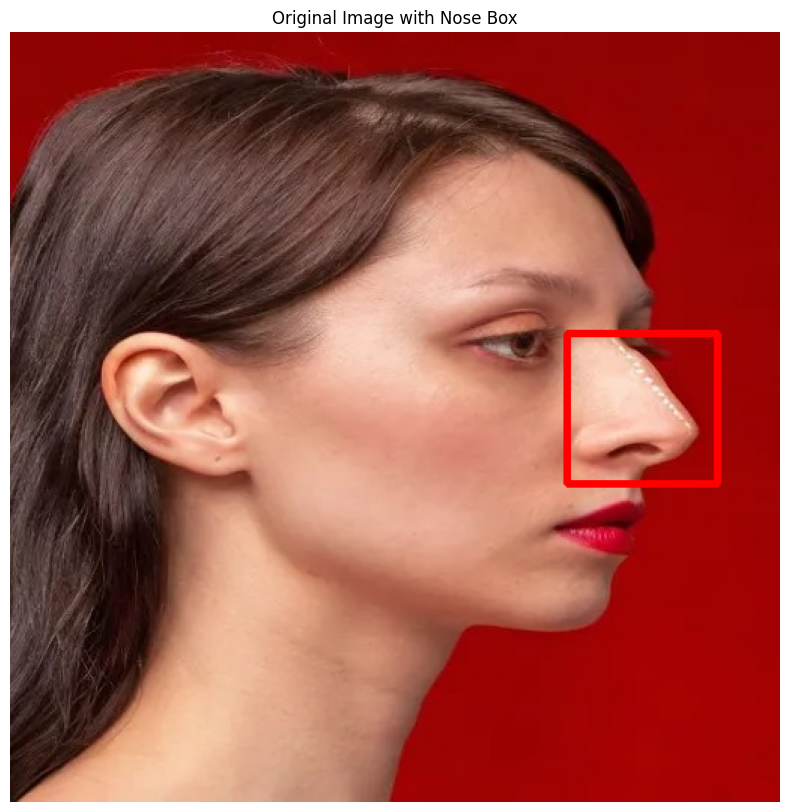

Image saved to image_with_nose_box.jpg


In [12]:
import cv2
from matplotlib import pyplot as plt

# Path to your original image
image_path = "/content/image.jpg"  # <-- Replace with your image file path

# Load image
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image not found or unable to load.")

# Convert BGR to RGB for displaying correctly with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Nose bounding box coordinates
x_min, y_min = 470, 200
x_max, y_max = 370, 300


# Draw rectangle (bounding box)
color = (255, 0, 0)  # Red color in BGR (for cv2)
thickness = 3
cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color, thickness)

# Show image with bounding box
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Original Image with Nose Box")
plt.axis("off")
plt.show()

# Optional: Save the image with bounding box
output_path = "image_with_nose_box.jpg"
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
print(f"Image saved to {output_path}")

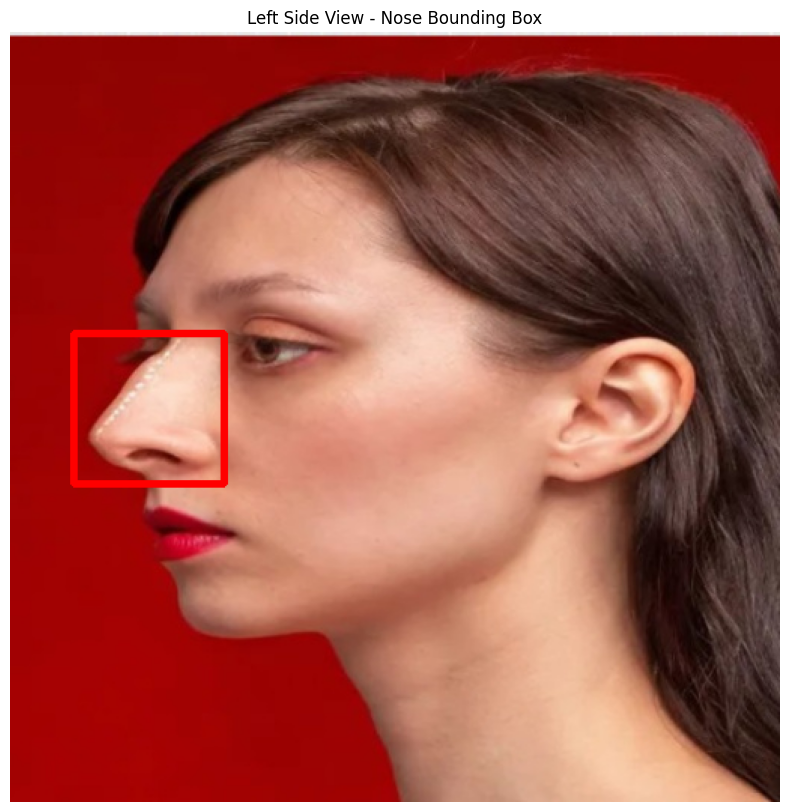

Image saved to left_side_nose_box.jpg


In [6]:
import cv2
from matplotlib import pyplot as plt

# Path to your original image
image_path = "/content/Screenshot2025-06-18141800.jpeg"  # <-- Replace with your image file path

# Load image
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image not found or unable to load.")

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Left-side nose bounding box coordinates (x, y, width, height)
x_min = 42
y_min = 200
box_width = 100
box_height = 100
x_max = x_min + box_width
y_max = y_min + box_height

# Draw rectangle
color = (255, 0, 0)  # Red (for OpenCV it's still BGR)
thickness = 3
cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), color, thickness)

# Show image with bounding box
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Left Side View - Nose Bounding Box")
plt.axis("off")
plt.show()

# Save output
output_path = "left_side_nose_box.jpg"
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
print(f"Image saved to {output_path}")